# 1

## 1a

In [4]:
import numpy as np
from scipy.sparse import spdiags, linalg
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib as mpl

plt.rcParams.update({'font.size': 14})

imgloc = r'D:/Uni/Master/Mulitscale_methods/DFT/tex/images'
dataloc = r'D:\Uni\Master\Mulitscale_methods\DFT\Code\Data'

def img_loc(loc: str):
    return rf'{imgloc}/{loc}'

def data_loc(loc: str):
    return rf'{dataloc}/{loc}'

In [2]:
n = 10_000_000
h = 8.89e-6
x_0 = 1e-50
x_vals = np.linspace(x_0, x_0+n*h, n)
diag = np.full(n, 2/(h**2)) - 2/x_vals
diag_off = np.full(n, -1/(h**2))
matrix = spdiags([diag_off, diag, diag_off], [-1, 0, 1], n, n)

# matrix.toarray()

In [3]:
value, vector = linalg.eigs(matrix, 3, sigma=-10)
value

array([-0.9999998 +0.j, -0.24999994+0.j, -0.11111108+0.j])

In [4]:
print(value + np.array([1, 0.25, 1/9]))

[2.04328190e-07+0.j 5.94209215e-08+0.j 3.54205309e-08+0.j]


D:\Anaconda\envs\DataAnalysis\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


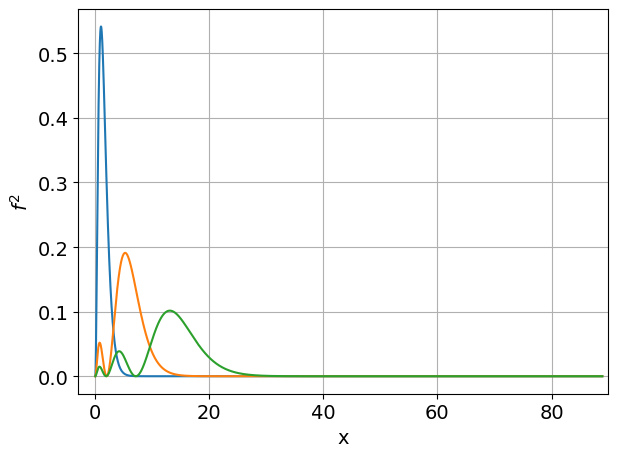

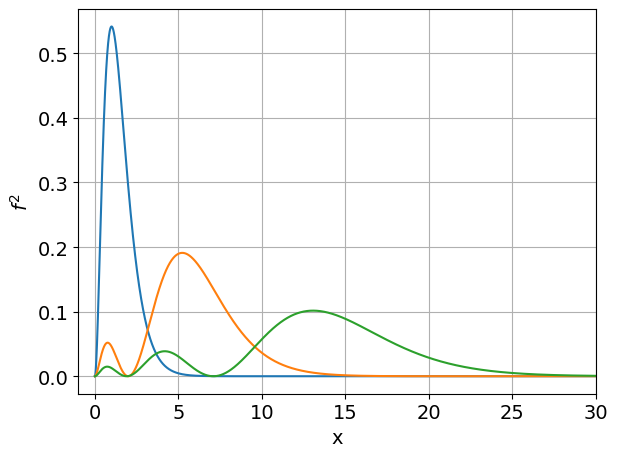

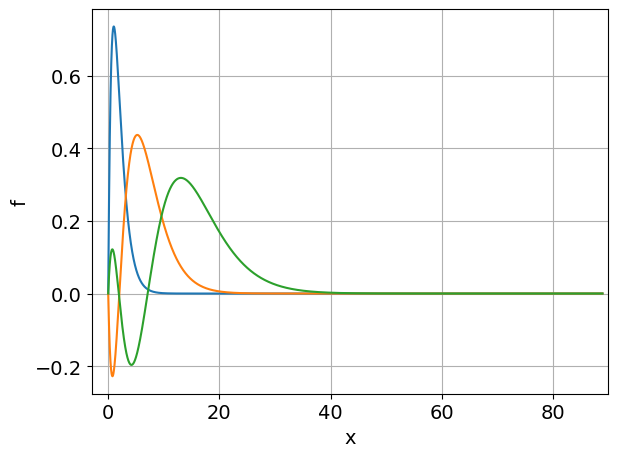

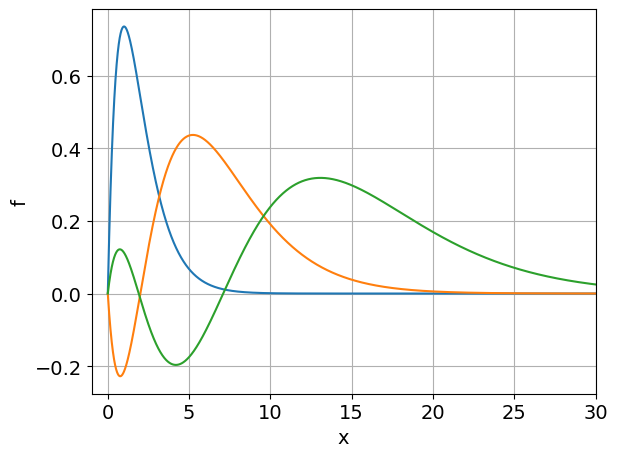

In [7]:
vec_sel = vector[::100]
x_val = x_vals[::100]
val_sel = value

plt.figure()
integral = np.trapz(vec_sel**2, x_val, axis=0)
plt.plot(x_val, vec_sel**2/integral)
plt.xlabel('x')
plt.ylabel('$f^2$')
plt.xlim(x_val[0]-3, x_val[-1]+1)
plt.tight_layout()
plt.grid()
plt.savefig(img_loc(r'1b_sq_wav.png'))
plt.show()

plt.figure()
integral = np.trapz(vec_sel**2, x_val, axis=0)
plt.plot(x_val, vec_sel**2/integral)
plt.xlabel('x')
plt.ylabel('$f^2$')
plt.xlim(-1, 30)
plt.tight_layout()
plt.grid()
plt.savefig(img_loc(r'1b_sq_wav_zoom.png'))
plt.show()

plt.figure()
plt.plot(x_val, np.sign(np.average(vec_sel, axis=0))*vec_sel/np.sqrt(integral))
plt.xlabel('x')
plt.ylabel('f')
plt.xlim(x_val[0]-3, x_val[-1]+1)
plt.tight_layout()
plt.grid()
plt.savefig(img_loc(r'1b_wav.png'))
plt.show()

plt.figure()
plt.plot(x_val, np.sign(np.average(vec_sel, axis=0))*vec_sel/np.sqrt(integral))
plt.xlabel('x')
plt.ylabel('f')
plt.xlim(x_val[0]-1, x_val[-1]+1)
plt.xlim(-1, 30)
plt.tight_layout()
plt.grid()
plt.savefig(img_loc(r'1b_wav_zoom.png'))
plt.show()

In [ ]:
n_vals = np.logspace(2, 6, 51, dtype=int)
h_vals = np.logspace(-5, 0, 51)
x_0s = np.logspace(-10, -100, 9)
for x_0 in x_0s:
    print(x_0)
    uno = np.zeros((len(n_vals), len(h_vals)))
    dos = np.zeros((len(n_vals), len(h_vals)))
    tres = np.zeros((len(n_vals), len(h_vals)))
    for i, n_val in enumerate(n_vals):
        for j, h_val in enumerate(h_vals):
            x_val = np.linspace(x_0, x_0+n_val*h_val, n_val)
            diag = np.full(n_val, 2/(h_val**2)) - 2/x_val
            diag_off = np.full(n_val, -1/(h_val**2))
            matrix = spdiags([diag_off, diag, diag_off], [-1, 0, 1], n_val, n_val)
            value, vector = linalg.eigs(matrix, 3, sigma=-1)
            uno[i, j] = value[0]
            dos[i, j] = value[1]
            tres[i, j] = value[2]
            print(f'\r i: {i}, j: {j}', end='')
    print('')
    np.savez(data_loc(rf'1_acc_x0_{x_0:.0e}'), uno=uno, dos=dos, tres=tres, n=n_vals, h=h_vals)


1e-10
 i: 0, j: 0
 i: 0, j: 1
 i: 0, j: 2
 i: 0, j: 3
 i: 0, j: 4
 i: 0, j: 5
 i: 0, j: 6
 i: 0, j: 7
 i: 0, j: 8
 i: 0, j: 9
 i: 0, j: 10
 i: 0, j: 11
 i: 0, j: 12
 i: 0, j: 13
 i: 0, j: 14
 i: 0, j: 15
 i: 0, j: 16
 i: 0, j: 17
 i: 0, j: 18
 i: 0, j: 19
 i: 0, j: 20
 i: 0, j: 21
 i: 0, j: 22
 i: 0, j: 23
 i: 0, j: 24
 i: 0, j: 25
 i: 0, j: 26
 i: 0, j: 27
 i: 0, j: 28
 i: 0, j: 29
 i: 0, j: 30
 i: 0, j: 31
 i: 0, j: 32
 i: 0, j: 33
 i: 0, j: 34
 i: 0, j: 35
 i: 0, j: 36
 i: 0, j: 37
 i: 0, j: 38
 i: 0, j: 39
 i: 0, j: 40
 i: 0, j: 41
 i: 0, j: 42
 i: 0, j: 43
 i: 0, j: 44
 i: 0, j: 45
 i: 0, j: 46
 i: 0, j: 47
 i: 0, j: 48
 i: 0, j: 49
 i: 0, j: 50
 i: 1, j: 0
 i: 1, j: 1
 i: 1, j: 2
 i: 1, j: 3
 i: 1, j: 4
 i: 1, j: 5
 i: 1, j: 6
 i: 1, j: 7
 i: 1, j: 8
 i: 1, j: 9
 i: 1, j: 10
 i: 1, j: 11
 i: 1, j: 12
 i: 1, j: 13
 i: 1, j: 14
 i: 1, j: 15
 i: 1, j: 16
 i: 1, j: 17
 i: 1, j: 18
 i: 1, j: 19
 i: 1, j: 20
 i: 1, j: 21
 i: 1, j: 22
 i: 1, j: 23
 i: 1, j: 24
 i: 1, j: 25
 i: 1, j: 26


C:\Users\drost\AppData\Local\Temp\ipykernel_6072\1601511371.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  uno[i, j] = value[0]
C:\Users\drost\AppData\Local\Temp\ipykernel_6072\1601511371.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  dos[i, j] = value[1]
C:\Users\drost\AppData\Local\Temp\ipykernel_6072\1601511371.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  tres[i, j] = value[2]


 i: 2, j: 5
 i: 2, j: 6
 i: 2, j: 7
 i: 2, j: 8
 i: 2, j: 9
 i: 2, j: 10
 i: 2, j: 11
 i: 2, j: 12
 i: 2, j: 13
 i: 2, j: 14
 i: 2, j: 15
 i: 2, j: 16
 i: 2, j: 17
 i: 2, j: 18
 i: 2, j: 19
 i: 2, j: 20
 i: 2, j: 21
 i: 2, j: 22
 i: 2, j: 23
 i: 2, j: 24
 i: 2, j: 25
 i: 2, j: 26
 i: 2, j: 27
 i: 2, j: 28
 i: 2, j: 29
 i: 2, j: 30
 i: 2, j: 31
 i: 2, j: 32
 i: 2, j: 33
 i: 2, j: 34
 i: 2, j: 35
 i: 2, j: 36
 i: 2, j: 37
 i: 2, j: 38
 i: 2, j: 39
 i: 2, j: 40
 i: 2, j: 41
 i: 2, j: 42
 i: 2, j: 43
 i: 2, j: 44
 i: 2, j: 45
 i: 2, j: 46
 i: 2, j: 47
 i: 2, j: 48
 i: 2, j: 49
 i: 2, j: 50
 i: 3, j: 0
 i: 3, j: 1
 i: 3, j: 2
 i: 3, j: 3
 i: 3, j: 4
 i: 3, j: 5
 i: 3, j: 6
 i: 3, j: 7
 i: 3, j: 8
 i: 3, j: 9
 i: 3, j: 10
 i: 3, j: 11
 i: 3, j: 12
 i: 3, j: 13
 i: 3, j: 14
 i: 3, j: 15
 i: 3, j: 16
 i: 3, j: 17
 i: 3, j: 18
 i: 3, j: 19
 i: 3, j: 20
 i: 3, j: 21
 i: 3, j: 22
 i: 3, j: 23
 i: 3, j: 24
 i: 3, j: 25
 i: 3, j: 26
 i: 3, j: 27
 i: 3, j: 28
 i: 3, j: 29
 i: 3, j: 30
 i: 3, j: 31
 

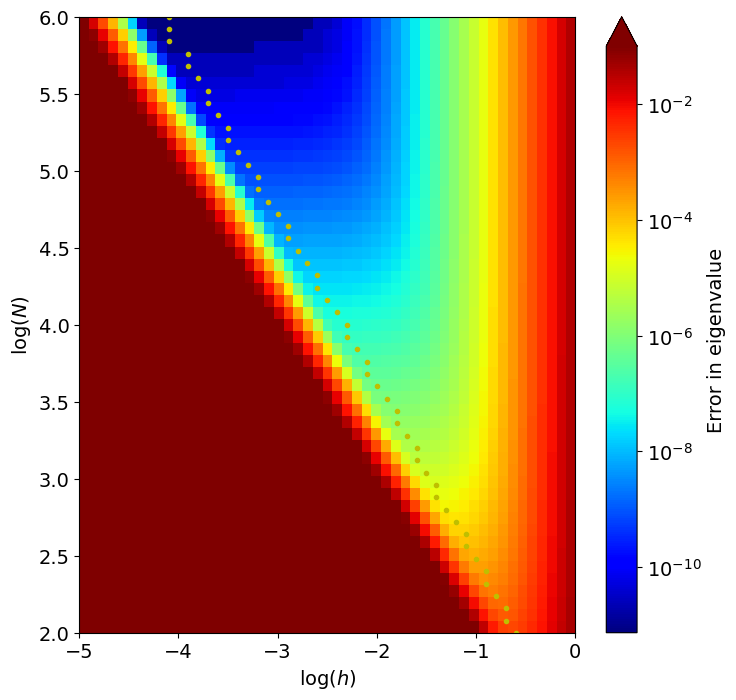

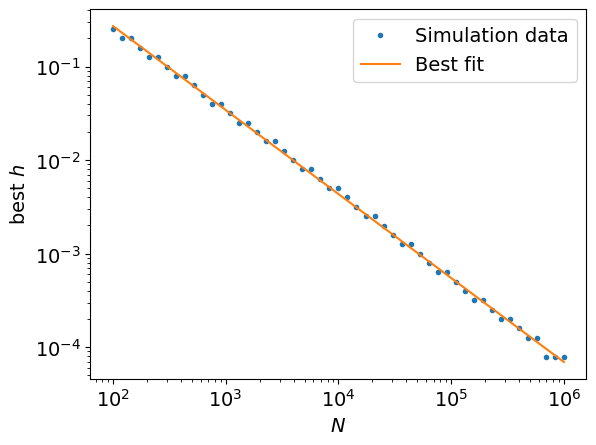

-0.8979 0.0042, 1.228 0.017


In [111]:
file = np.load(data_loc(r'1_acc_x0_1e-50.npz'))
h_vals = file['h']
n_vals = file['n']
res = (file['uno'] + 1 + file['dos'] + 0.25 + file['tres'] + 1/9)**2
# res = (file['array'] + 1)**2

indexes = np.argmin(res, axis=1)
norm = mpl_colors.LogNorm(vmin=res.min(), vmax=1e-1)
plt.figure(figsize=(8, 8))
plt.imshow(res, norm=norm, extent=np.log10([h_vals[0], h_vals[-1], n_vals[0], n_vals[-1]]), cmap='jet', origin='lower', aspect='auto')
# plt.imshow(res, norm=mpl_colors.LogNorm(vmin=1e-5, vmax=1e-2), extent=np.log10([h_vals[0], h_vals[-1], n_vals[0], n_vals[-1]]), cmap='jet')
plt.plot(np.log10(h_vals[indexes]), np.log10(n_vals), 'y.')
plt.colorbar(label='Error in eigenvalue', extend='max')
plt.xlabel('log($h$)')
plt.ylabel('log($N$)')
plt.savefig(img_loc(r'1b_stability.png'))
plt.show()

# norm = mpl_colors.LogNorm(vmin=n_vals.min(), vmax=n_vals.max())
# cmap = plt.colormaps.get('jet')
# scalar_map = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
# plt.figure()
# for n, row in zip(n_vals, res):
#     low_index = np.argmin(row)
#     plt.loglog(h_vals, row, color=cmap(norm(n)))
#     plt.plot(h_vals[low_index], row[low_index], '.', color=cmap(norm(n)))
# plt.colorbar(scalar_map, label='n')
# plt.xlabel('h')
# plt.ylabel('Sq error')
# plt.ylim(1e-12, 1e-1)
# plt.show()
#
# norm = mpl_colors.LogNorm(vmin=h_vals.min(), vmax=h_vals.max())
# cmap = plt.colormaps.get('jet')
# scalar_map = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
# plt.figure()
# for n, row in zip(h_vals[::-1], res.T[::-1]):
#     # low_index = np.argmin(row)
#     plt.loglog(n_vals, row, color=cmap(norm(n)))
#     # plt.plot(n_vals[low_index], row[low_index], '.', color=cmap(norm(n)))
# plt.colorbar(scalar_map, label='h')
# plt.xlabel('h')
# plt.ylabel('Sq error')
# plt.show()

indexes = np.argmin(res, axis=1)
fit, cov = np.polyfit(np.log10(n_vals), np.log10(h_vals[indexes]), 1, cov=True)
plt.figure()
plt.loglog(n_vals, h_vals[indexes], '.', label='Simulation data')
plt.plot(n_vals, 10**(fit[1])*n_vals**fit[0], label='Best fit')
plt.xlabel('$N$')
plt.ylabel('best $h$')
plt.legend()
plt.savefig(img_loc(r'1b_stability_best_fit_x0_1e-100.png'))
plt.show()

print(f'{fit[0]:.4f} {np.sqrt(cov[0, 0]):.4f}, {fit[1]:.3f} {np.sqrt(cov[1, 1]):.3f}')

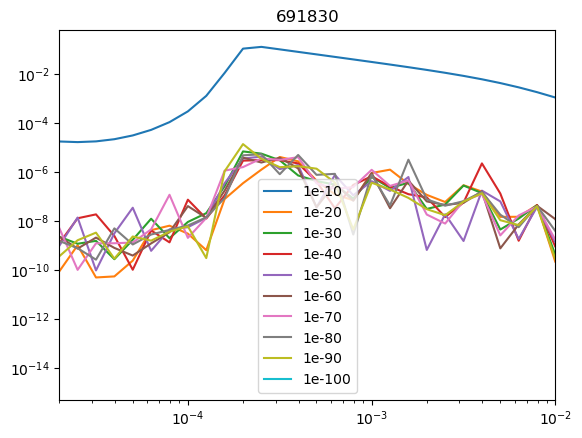

In [61]:
x0s = [1e-10, 1e-20, 1e-30, 1e-40, 1e-50, 1e-60, 1e-70, 1e-80, 1e-90, 1e-100]
out = []
for x0 in x0s:
    file = np.load(data_loc(fr'1_acc_x0_{x0:.0e}.npz'))
    h_vals = file['h']
    n_vals = file['n']
    out.append((file['uno'] + 1 + file['dos'] + 0.25 + file['tres'] + 1/9)**2)

index = -10
rel = out[-1][index]
plt.figure()
for x0, values in zip(x0s, out, strict=True):
    plt.loglog(h_vals, abs(values[index]/rel - 1), label=x0)
plt.title(n_vals[-3])
# plt.ylim(1e-12, 1e-10)
plt.xlim(2e-5, 1e-2)
plt.legend()
plt.show()


In [94]:
n_val = 10**6
h_val = 10**1.228 * n_val**-0.9
x_0s = [1e-100, 2.2250738585072014e-308]
for x_0 in x_0s:
    x_val = np.linspace(x_0, x_0+n_val*h_val, n_val)
    diag = np.full(n_val, 2/(h_val**2)) - 2/x_val
    diag_off = np.full(n_val, -1/(h_val**2))
    matrix = spdiags([diag_off, diag, diag_off], [-1, 0, 1], n_val, n_val)
    value, vector = linalg.eigs(matrix, 3, sigma=-1)
    theo = np.array([-1, -1/4, -1/9])
    print(f'{x_0:.0e}: {abs(value-theo)}')

6.729766562843176e-05
1e-100: [1.99323793e-06 5.00564761e-07 2.22136368e-07]
2e-308: [1.99323793e-06 5.00478002e-07 2.22040801e-07]


## 1b

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sc_spec
from scipy.sparse import linalg
from scipy.linalg import eig

plt.rcParams.update({'font.size': 14})
imgloc = r'D:/Uni/Master/Mulitscale_methods/DFT/tex/images'

def img_loc(loc: str):
    return rf'{imgloc}/{loc}'


def s_mat(m, n):
    return sc_spec.factorial(m+n)

def a_mat(m, n):
    return (n*m -2*(n+m-1))*sc_spec.factorial(n+m-2) -0.25*sc_spec.factorial(n+m)

def func(a, x):
    return x**a * np.exp(-0.5*x)

[-1.        +0.j -0.25      +0.j -0.11111111+0.j]


D:\Anaconda\envs\DataAnalysis\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


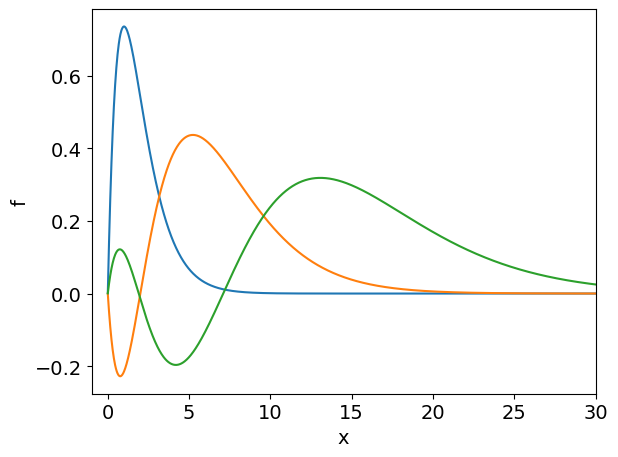

D:\Anaconda\envs\DataAnalysis\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py:1265: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "
C:\Users\drost\AppData\Local\Temp\ipykernel_16112\3358040901.py:37: ComplexWarning: Casting complex values to real discards the imaginary part
  res[i] = np.sort(out[0])[:3]


[-0.99569977+0.j -0.25      +0.j -0.0998956 +0.j  0.34559538+0.j]
[-0.9992542 +0.j -0.25      +0.j -0.10932618+0.j]
[-0.99988179+0.j -0.25      +0.j -0.11086014+0.j]
[-0.9999823 +0.j -0.25      +0.j -0.11108182+0.j]
[-0.99999745+0.j -0.25      +0.j -0.1111082 +0.j]
[-0.99999964+0.j -0.25      +0.j -0.11111086+0.j]
[-0.99999995+0.j -0.25      +0.j -0.11111109+0.j]
[-0.99999999+0.j -0.25      +0.j -0.11111111+0.j]
[-1.        +0.j -0.25      +0.j -0.11111111+0.j]
[-1.        +0.j -0.25      +0.j -0.11111111+0.j]
[-1.       +0.j -0.25     +0.j -0.1111111+0.j]
[-1.        +0.j -0.25      +0.j -0.11111113+0.j]
[-1.        +0.j -0.24999999+0.j -0.11111126+0.j]
[-1.        +0.j -0.59081269+0.j -0.24999883+0.j]


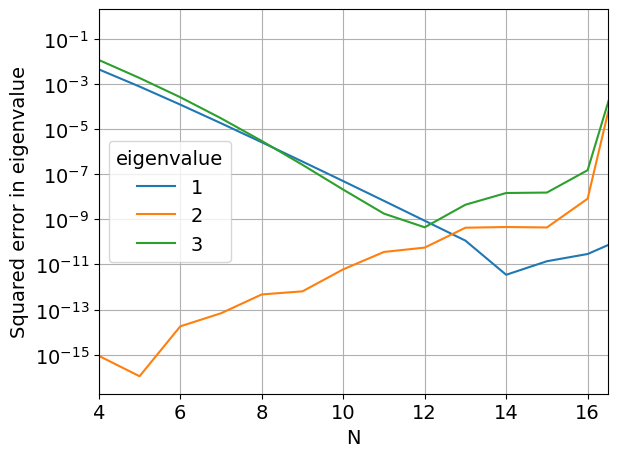

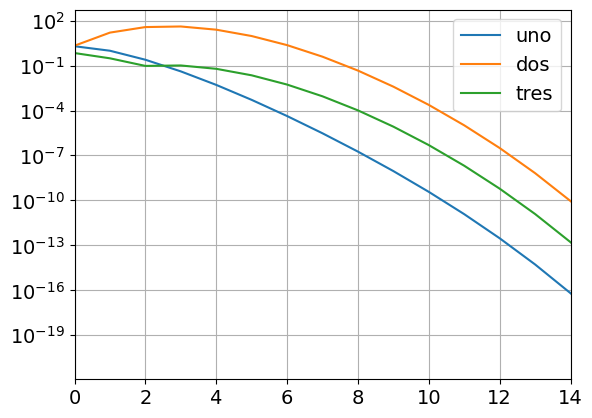

In [14]:
num = 13
x_arr = np.linspace(1e-3, 50, 2000)

m = np.arange(1, num+1)
n = m.copy()[:, None]

s = s_mat(m, n)
a = a_mat(m, n)

# value, vector = sc_linalg.eig(a, s)
value, vector = linalg.eigs(a, k=3, M=s, sigma=-1)
print(value)

plt.figure()
for vec in vector.T[:3]:
    res = np.sum(vec*func(m, x_arr[:, None]), axis=1)
    integral = np.trapz(res**2, x_arr)
    plt.plot(x_arr, np.sign(np.average(res))*res/np.sqrt(integral))
plt.xlim(-1, 30)
plt.xlabel('x')
plt.ylabel('f')
plt.tight_layout()
plt.savefig(img_loc(rf'2b_res_M{num}.png'))
plt.show()

m_vals = np.arange(4, 18)
res = np.zeros((len(m_vals), 3))
for i, num in enumerate(m_vals):
    m = np.arange(1, num+1)
    n = m.copy()[:, None]

    s = s_mat(m, n)
    a = a_mat(m, n)
    out = linalg.eigs(a, k=3, M=s, sigma=-1)
    # out = eig(a, s)
    print(np.sort(out[0]))
    res[i] = np.sort(out[0])[:3]

index = 14
m_vals, res = m_vals[:index], res[:index]

plt.figure()
plt.semilogy(m_vals, abs(res[:, 0]+1), label='1')
plt.semilogy(m_vals, abs(res[:, 1]+0.25), label='2')
plt.semilogy(m_vals, abs(res[:, 2]+1/9), label='3')
# plt.semilogy(m_vals, abs(res[:, 0]+1)+abs(res[:, 1]+0.25)+abs(res[:, 2]+1/9), label='total')
plt.xlabel('N')
plt.ylabel('Squared error in eigenvalue')
plt.xlim(m_vals[0], 16.5)
plt.legend(title='eigenvalue')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc(r'2b_stability.png'))
plt.show()


plt.figure()
plt.semilogy(abs(out[1][:, 0]), label='uno')
plt.plot(abs(out[1][:, 1]), label='dos')
plt.plot(abs(out[1][:, 2]), label='tres')
plt.xlim(0, 14)
plt.grid()
plt.legend()
plt.show()

In [5]:
n = 10_000_000
h = 8.89e-6
x_0 = 1e-50
x_val = np.linspace(x_0, x_0 + n * h, n)
diag = np.full(n, 2 / (h ** 2)) - 2 / x_val
diag_off = np.full(n, -1 / (h ** 2))
matrix = spdiags([diag_off, diag, diag_off], [-1, 0, 1], n, n)

# matrix.toarray()
value_old, vector_old = linalg.eigs(matrix, 3, sigma=-10)

[ 1.12262311e-10+0.j -1.89790739e-10+0.j  5.28554145e-10+0.j]
(3.70592192857614e-14+0j)
(2.236095359359028e-16+0j)


D:\Anaconda\envs\DataAnalysis\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(4.1361622867507144e-15+0j)


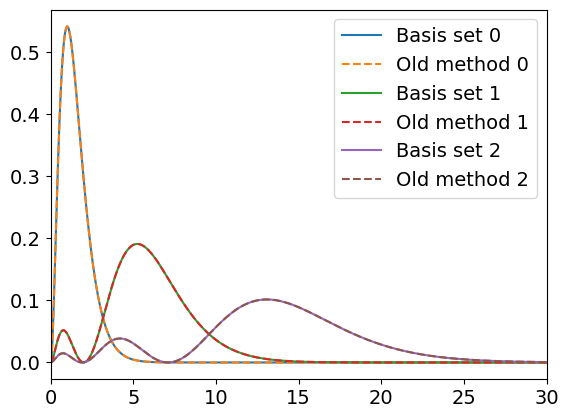

(6.458696076822125e-13+0j)
(9.316743923348177e-16+0j)
(5.248731762126808e-13+0j)


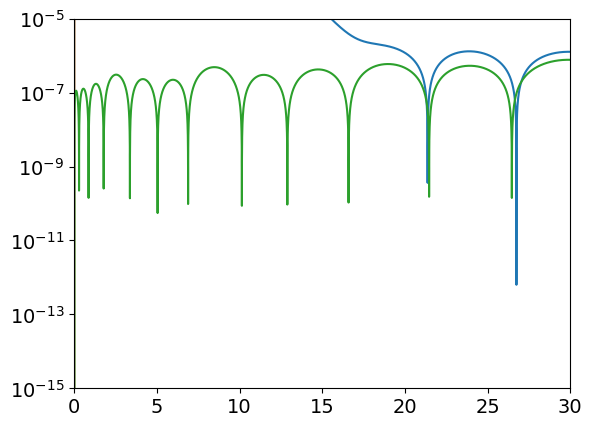

In [11]:
num = 13

m = np.arange(1, num+1)
n = m.copy()[:, None]

s = s_mat(m, n)
a = a_mat(m, n)

# value, vector = sc_linalg.eig(a, s)
value_new, vector_new = linalg.eigs(a, k=3, M=s, sigma=-1)
print((value_new-np.array([-1, -1/4, -1/9])))
every = 100
plt.figure()
for index, (vec_old, vec_new) in enumerate(zip(vector_old.T, vector_new.T)):
    res = np.sum(vec_new*func(m, x_val[::every][:, None]), axis=1)
    integral = np.trapz(res**2, x_val[::every])
    plt.plot(x_val[::every], res**2/integral, '-', label=f'Basis set {index}')
    integral2 = np.trapz(vec_old[::every]**2, x_val[::every])
    plt.plot(x_val[::every], vec_old[::every]**2/integral2, '--', label=f'Old method {index}')
    print(np.average((res**2/integral - vec_old[::every]**2/integral2)**2))
plt.legend()
plt.xlim(0, 30)
# plt.yscale('log')
# plt.ylim(1e-5, 1)
plt.savefig(img_loc(rf'2b_comparison.png'))
plt.show()

plt.figure()
for index, (vec_old, vec_new) in enumerate(zip(vector_old.T, vector_new.T)):
    res = np.sum(vec_new*func(m, x_val[::every][:, None]), axis=1)
    integral = np.trapz(res**2, x_val[::every])
    integral2 = np.trapz(vec_old[::every]**2, x_val[::every])
    plt.plot(x_val[::every], np.abs(np.sign(vec_old[-1])*vec_old[::every]/np.sqrt(integral2)-np.sign(res[-1])*res/np.sqrt(integral)))

    print(np.average((np.sign(np.average(vec_old))*vec_old[::every]/np.sqrt(integral2)
                      -np.sign(np.average(res))*res/np.sqrt(integral))**2))
plt.xlim(0, 30)
plt.yscale('log')
plt.ylim(1e-15, 1e-5)
plt.savefig(img_loc(rf'2b_relative.png'))
plt.show()